# Black Friday Sales Case Study

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Business Problem**

The Management team at Black Friday Sales Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset**

The company collected the transactional data of customers who purchased products from the Black Friday Sales Stores during Black Friday. The dataset has the following features:

- User_ID    :	User ID
- Product_ID :	Product ID
- Gender     :	Sex of User
- Age        :	Age in bins
- Occupation :	Occupation(Masked)
- City_Category         :	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status        :	Marital Status
- ProductCategory       :	Product Category (Masked)
- Purchase              :	Purchase Amount

**Importing required packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN, nan, NAN
from scipy import stats
# import matplotlib.style as style
# style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

**Loading data into Dataframe**

In [ ]:
black_friday_df = pd.read_csv('../input/black-friday/train.csv')
black_friday_df

**Checking the structure & characteristics of the dataset**

In [ ]:
black_friday_df.describe()

In [ ]:
black_friday_df.info()

**Changing datatype of Gender, Age,City Category, Marital Status, User_ID and Product_ID from Object to Category.**

In [ ]:
cols = ['Gender', 'Age','Product_ID','City_Category','User_ID']
for i in cols:
    black_friday_df[i] = black_friday_df[i].astype("category")
black_friday_df.info()

In [ ]:
black_friday_df.isnull().sum()/len(black_friday_df) *100

In [ ]:
black_friday_df.nunique()

In [ ]:
black_friday_df.duplicated().sum()

# **Outliers detection**

In [ ]:
black_friday_df.describe()

In [ ]:
sns.boxplot(x = 'Gender', y = 'Purchase', data = black_friday_df)
plt.show()

In [ ]:
sns.boxplot(x = 'Age', y = 'Purchase', data = black_friday_df)
plt.show()

In [ ]:
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = black_friday_df)
plt.show()

**Observations**:
- As we can see from above three boxplots of Gender, Age and Marital Status vs Purchase, the outliers even if they are present, they are not having any significant effect. Hence doing the analysis by keeping them.
- With regards to null values, there are no null values found in the dataset.

# EDA - Univariate Analysis

**1.Numerical features**

In [ ]:
def num_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(col_data, kde=True, ax=ax[0])
    ax[0].axvline(col_data.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(col_data.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(col_data.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':col_data.mean(),'Median':col_data.median(),'Mode':col_data.mode()})
    
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    plt.tight_layout()


In [ ]:
num_cols = black_friday_df.select_dtypes('int64').columns.values
num_cols


In [ ]:
for i in num_cols:
    num_feat(black_friday_df[i])

**Observations**:
- As we can clearly see that, there are few outliers for Product Category and Purchase.
- For purchase, the distribution is clearly not a normal distribution. So with the help of CLT we need to plot a distribution of sampling means in order to draw some insights.

**2.Catagorical features:**

In [ ]:
black_friday_df.info()

In [ ]:
cat_cols = black_friday_df.select_dtypes('category').columns.values
cat_cols

**1.Gender**

In [ ]:
#EDA on Univariate Categorical variables
def cat_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    fig.suptitle(col_data.name+' Wise Sale',fontsize=15)
    sns.countplot(col_data,ax=ax[0])
    col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)
    plt.tight_layout()

In [ ]:
# black_friday_df.Product_ID.value_counts()
black_friday_df['Gender'].value_counts()

In [ ]:
cat_feat(black_friday_df['Gender'])

**Observations**:
- As we can clearly see that, there are more no. of males purchasing than females

**2.Age**

In [ ]:
black_friday_df['Age'].value_counts()

In [ ]:
cat_feat(black_friday_df['Age'])

**Observations**:
- As we can clearly see that, the customers/consumers in productive age group of 25-35 years are purchasing the most(39.9%), whereas, the minimalistic age range is 0-17 contributing to only 2.7% of all the Black Friday Sales items purchased.

**3.City_Category**

In [ ]:
black_friday_df['City_Category'].value_counts()

In [ ]:
cat_feat(black_friday_df['City_Category'])

**Observations**:
- As we can clearly see that, the customers of city of category 'B' are purchasing the most(42%), whereas the people from City category A are least interested in purchasing from Black Friday Sales.


**4.Marital_Status**

In [ ]:
black_friday_df['Marital_Status'].replace(to_replace = 0, value = 'Unmarried', inplace = True)
black_friday_df['Marital_Status'].replace(to_replace = 1, value = 'Married', inplace = True)

In [ ]:
black_friday_df['Marital_Status'].value_counts()

In [ ]:
cat_feat(black_friday_df['Marital_Status'])

**Observations**:
- As we can clearly see that, the customers of city of category 'B' are purchasing the most(42%), whereas the people from City category A are least interested in purchasing from Black Friday Sales.

**Inferences**:
- Black Friday Sales management should focus on establishments and infrastructure on B- Category cities, and the target audience for catering user-specific needs should include **Unmarried men in the age froup of 25-35 years belonging to B-categorical cities** in order to gain higher R.O.I.

# EDA - Bivariate Analysis

In [ ]:
black_friday_df.info() 

In [ ]:
black_friday_df['Product_Category_1'].unique()

In [ ]:
sns.lineplot(x='City_Category',y='Purchase',  data=black_friday_df,  hue='Gender')
plt.show()

**Observations**:
- Both Male and Female  population from Category C cities are purchasing the most. Whereas, females from category B are least interested in purchasing and males from category A cities have shown least interest.


In [ ]:
sns.barplot(x='Product_Category_1',y='Purchase',  data=black_friday_df,  hue='Gender')
plt.show()

**Observations**:
- For Product category no. 4,11,12, 13,18,19, and 20 , the customers seems to be least interested in purchasing

In [ ]:
sns.lineplot(x='Age',y='Purchase',  data=black_friday_df,  hue='City_Category')
plt.show()

In [ ]:
sns.lineplot(x='Marital_Status',y='Purchase',  data=black_friday_df,  hue='City_Category')
plt.show()

**Observations**:
- People from Category C cities seems to be well off and financially good as they are in the higher purchasing groups whereas, people with Age 55+ from B category cities are purching the most from Black Friday Sales. People from Category A cities seems to be financially weaker or can be considered as Tier 3 cities where Black Friday Sales needs to focus on infrastructure, advertisements and marketing to increase the sale.
- The married class from these tier 3 cities tends to purchase less from Black Friday Sales.

In [ ]:
gender_nos = black_friday_df.groupby(['Age','Gender'])['Gender'].count()
gender_nos = gender_nos.unstack(level = 'Gender')
print(gender_nos)

In [ ]:
print("Total purchase by male and female is \n",black_friday_df.groupby('Gender')['Purchase'].sum())
print(black_friday_df.groupby('City_Category')['Purchase'].sum())
black_friday_df.groupby('City_Category')['Purchase'].sum().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel("Total purchase")

**Observations**:
- Overall purchase from Category B cities is the highest of all.

In [ ]:
print(round(black_friday_df.Stay_In_Current_City_Years.value_counts(normalize = True) *100,2))

**Observations**:
- It is clearly visible that 35% population is prefer to stay in a city for almost 1 year.


In [ ]:
print(black_friday_df.groupby(['Gender','City_Category'])['Purchase'].sum())
black_friday_df.groupby(['Gender','City_Category'])['Purchase'].sum().plot(kind = 'barh')
plt.xlabel('Total purchase')

**Observations**:
- Total Purchase done id highest from males from tier 2 cities i.e Category B cities whereas females from tier 3 cities i.e Category A cities tends to puchase the least of all from Black Friday Sales

In [ ]:
print(black_friday_df.groupby(['Stay_In_Current_City_Years','City_Category'])['City_Category'].count().
      unstack(level = 'City_Category'))

**Observations**:
- More people are living in city category B and they prefer to stay for atleast one year in the city

In [ ]:
plt.figure(figsize = (8,6))

hist = black_friday_df.Age.value_counts()
print(hist)

hist.plot(kind = 'barh')
plt.xlabel('Total purchase')
plt.ylabel('Age Range of customers purchasing products')

**Observations**:
- As we can clearly see that, the customers/consumers in productive age group of 25-35 years are purchasing the most(39.9%), whereas, the minimalistic age range is 0-17 contributing to only 2.7% of all the Black Friday Sales items purchased.

**Analysis on how marital status plays a role on different features of the data.**

In [ ]:
black_friday_df.groupby(['Marital_Status','Age'])['Purchase'].sum().plot(kind = 'bar')
plt.ylabel('Total Purchase')
plt.xticks(rotation = 75)

**Observations and Inferences**:
- Most purchase done is from the age group of 26-35 and unmarried , wherease least is done from unmarried with 55+ age.

In [ ]:
black_friday_df.groupby(['Marital_Status','Occupation'])['Purchase'].sum().unstack(level='Marital_Status')

In [ ]:
black_friday_df.groupby(['Marital_Status','City_Category','Gender'])['Purchase'].count().unstack(level = 'City_Category')

In [ ]:
black_friday_df.groupby(['Marital_Status','Stay_In_Current_City_Years','City_Category','Gender'])['Purchase'].count().unstack(level ='Stay_In_Current_City_Years')

**Observations**:

- Here occupations 8,9 and 13 has more purchase in married category than unmarried.
- Male and female from both married and unmarried status if they belongs to city category B then they would spend more.
- If someone belongs to unmarried,married category and if stays in current city for 1 year then chances of purchase is more as compared to other categories

# CLT on Purchase done by Gender specific Categorization

In [ ]:
print(black_friday_df.groupby(['Gender'])['User_ID'].nunique())
print(round(black_friday_df.groupby(['Gender'])['User_ID'].nunique()/black_friday_df['User_ID'].nunique() * 100,2))

In [ ]:
sns.displot(data = black_friday_df, x = 'Purchase', hue = 'Gender',bins = 25)
plt.show()

**Observations** : We can clearly see that, no. of females purchasing from Black Friday Saless are comaparitively low in count than no. of males.

In [ ]:
black_friday_df.groupby(['Gender'])['Purchase'].describe()

In [ ]:
black_friday_df.sample(300).groupby(['Gender'])['Purchase'].describe()

In [ ]:
black_friday_df_sample1 = black_friday_df[black_friday_df['Gender'] == 'M']
type(black_friday_df_sample1)

In [ ]:
black_friday_df_sample_purchase = black_friday_df_sample1['Purchase']
len(black_friday_df_sample_purchase)

In [ ]:
black_friday_df_sample2 = black_friday_df[black_friday_df['Gender'] == 'F']
black_friday_df_sample_purchase_fem = black_friday_df_sample2['Purchase']
len(black_friday_df_sample_purchase_fem)

In [ ]:
black_friday_df_sample_purchase.hist(bins = 25)

**Observations**:
- As we can see, the above plot is not normal distribution and if we assume it to be normal and do all calculations based on it, it might lead us to wrong conclusion and hence applying CLT to get the sampling distribution of sample means to get a Normal Distribution out of it.

In [ ]:
black_friday_df_sample_purchase.mean()

In [ ]:
black_friday_df_sample_purchase.std()

In [ ]:
black_friday_df_sample1.shape

In [ ]:
len(black_friday_df_sample_purchase)

So mean lies somewhere in the left side, not symmnetric, it's Right Skewed

**Bootstrapping**

In [ ]:

m = 1000
sample = black_friday_df_sample_purchase 
size = 1000 
bs_means = np.empty(m)

for i in range(m):
    bs_sample = np.random.choice(sample, size = size)
    bs_means[i] = np.mean(bs_sample)
plt.figure()
plt.hist(bs_means, bins = 25)
plt.title(f"Sampling Distribution with sample size = 1000 , mean = {np.mean(bs_means)}, standard deviation = {np.std(bs_means)}")
plt.show()


In [ ]:
# plt.hist(bs_means, bins = 25);

In [ ]:
# for comparison
black_friday_df.groupby(['Gender'])['Purchase'].describe()

**Effect of n i.e sample size**

In [ ]:
m = 1000 # lenth of "sampling distribution of sample means"
sample = black_friday_df_sample_purchase
size_list = [1, 5, 10, 20, 30, 100,300, 1000, len(black_friday_df_sample_purchase)]


for n in size_list:
    bs_means_n = np.empty(m)
    for i in range(m):
        bs_sample_n = np.random.choice(sample, size = n)
        bs_means_n[i] = np.mean(bs_sample_n)
    plt.figure()
    plt.hist(bs_means_n, bins = 25)
    plt.title(f"Sampling Distribution with n = {n}, mean = {np.mean(bs_means_n)}, standard deviation = {np.std(bs_means_n)}")
    plt.show()
        

**Standard Error**

In [ ]:
m = 1000
sample = black_friday_df_sample_purchase
size_list = [1, 5, 10, 20, 30, 100, 300, 1000, len(black_friday_df_sample_purchase)]


for n in size_list:
    bs_means_n = np.empty(m)
    for i in range(m):
        bs_sample_n = np.random.choice(sample, size = n)
        bs_means_n[i] = np.mean(bs_sample_n)
    print(f"sample size = {n}, Emperical Standard Error = {np.std(bs_means_n)}, Theoretical Standard Error = {np.std(sample)/np.sqrt(n)}")
    

**Observations**:

- As sample size increases, Standard error (standard deviation of **sampling distribution of sampling means**) decreases. And we want the standard error to be minimized which we have brougt to 8.13 from 5092(org data).
- Is our sample size big enough ? 
    - As we can see that our **sampling distribution is normally distributed**,after n = 30, but as per the difference in the enpirical standard error and theoritical std erro, we can safey take any sample range from (200 - 600)
    - Checking **confidence intervals, if the range of interval estimates is high**,  we have increased the sample size.

In [ ]:
Confidence_95 = np.percentile(bs_means, 97.5) - np.percentile(bs_means, 2.5)
print(f"The avg mean for male population purchasing items from Black Friday Sales within 95% area (confidence) is {np.percentile(bs_means, 2.5), np.percentile(bs_means, 97.5) }")

In [ ]:
black_friday_df.groupby(['Gender'])['Purchase'].describe()

In [ ]:
# Another approach for CLT

In [ ]:
black_friday_df['Gender'].unique()

In [ ]:
# CLT on Males

In [ ]:
male_expense_mean = [black_friday_df[black_friday_df['Gender'] == 'M']['Purchase'].sample(1000).mean() for i in range(1000)]
sns.displot(male_expense_mean, bins = 100, kde = True)
plt.show()

In [ ]:
pd.Series(male_expense_mean).mean(),pd.Series(male_expense_mean).std() 
# Std deviation is changed from 5092 to 158 for a sample of 1000

In [ ]:
# Calculating confidence interval for 90, 95, 99 % Confidence

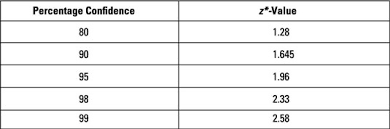

In [ ]:
# For 90% for All men

In [ ]:
lower_limit_males = pd.Series(male_expense_mean).mean() - (pd.Series(male_expense_mean).std()*1.28)
upper_limit_males = pd.Series(male_expense_mean).mean() + (pd.Series(male_expense_mean).std()*1.28)
lower_limit_males_90 = round(lower_limit_males,2)
upper_limit_males_90 = round(upper_limit_males,2)
lower_limit_males_90,upper_limit_males_90

**The mean of the purchase done by All Men will lie in the range (9064.74, 9815.74) with 91% confidence**

In [ ]:
# For 95% for All men:
lower_limit_males_95 = round(pd.Series(male_expense_mean).mean() - (pd.Series(male_expense_mean).std()*1.96),2)
upper_limit_males_95 = round(pd.Series(male_expense_mean).mean() + (pd.Series(male_expense_mean).std()*1.96),2)
lower_limit_males_95,upper_limit_males_95

**The mean of the purchase done by All Men will lie in the range (8865.25, 10015.22) with 95% confidence**

In [ ]:
# For 99% for All men:
lower_limit_males_99 = round(pd.Series(male_expense_mean).mean() - (pd.Series(male_expense_mean).std()*2.58),2)
upper_limit_males_99 = round(pd.Series(male_expense_mean).mean() + (pd.Series(male_expense_mean).std()*2.58),2)
lower_limit_males_99, upper_limit_males_99

**The mean of the purchase done by All Men will lie in the range (8683.37, 10197.11) with 99% confidence**

In [ ]:
Confidence_Dict_Male = {"90%" : 1.28, "95%" : 1.96, "99%" : 2.58}
for key,value in Confidence_Dict_Male.items():
    lower_limit_males = round(pd.Series(male_expense_mean).mean() - (pd.Series(male_expense_mean).std()*value),2)
    upper_limit_males = round(pd.Series(male_expense_mean).mean() + (pd.Series(male_expense_mean).std()*value),2)
    print(f"The mean of the purchase done by All Men will lie in the range {lower_limit_males, upper_limit_males} with {key} confidence")

In [ ]:
# CLT on Females

In [ ]:
female_expense_mean = [black_friday_df[black_friday_df['Gender'] == 'F']['Purchase'].sample(1000).mean() for i in range(1000)]
len(female_expense_mean)
sns.displot(female_expense_mean, bins = 100, kde = True)
plt.show()

In [ ]:
pd.Series(female_expense_mean).mean(),pd.Series(female_expense_mean).std()
 # Std deviation is changed from 4767 to 146 

In [ ]:
Confidence_Dict_female = {"90%" : 1.28, "95%" : 1.96, "99%" : 2.58}
for key,value in Confidence_Dict_female.items():
    lower_limit_females = round(pd.Series(female_expense_mean).mean() - (pd.Series(female_expense_mean).std()*value),2)
    upper_limit_females = round(pd.Series(female_expense_mean).mean() + (pd.Series(female_expense_mean).std()*value),2)
    print(f"The mean of the purchase done by All Females will lie in the range {lower_limit_females, upper_limit_females} with {key} confidence")
    

In [ ]:
# Overlap in confidence interval

In [ ]:
mu_male = 9443
mu_female = 8737
sd_male = 159
sd_female = 147

for i in [0.9, 0.95, 0.99]:
    
    ci1 = stats.norm.interval(i, loc=mu_male, scale=sd_male)
    ci2 = stats.norm.interval(i, loc=mu_female, scale=sd_female)

    def returnNormalY(x, mu, sd):
        return 1/(sd * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sd**2))

    # Generate Data for Plot
    # Fill Section
    x1 = np.linspace(ci1[0], ci1[1], 1000)
    y1 = returnNormalY(x1, mu_male, sd_male)
    x2 = np.linspace(ci2[0], ci2[1], 1000)
    y2 = returnNormalY(x2, mu_female, sd_female)
    # Line Section
    x1_line = np.linspace(0, 17)
    y1_line = returnNormalY(x1_line, mu_male, sd_male)
    x2_line = np.linspace(9, 25)
    y2_line = returnNormalY(x2_line, mu_female, sd_female)

    # Generate Plot
    fig, ax = plt.subplots()
    ax.plot(x1_line, y1_line)
    ax.plot(x2_line, y2_line)
    ax.fill_between(x1, y1, alpha=0.3)
    ax.fill_between(x2, y2, alpha=0.3)

    # Plot Editing
    fig.set_size_inches(8, 6, forward=False)
    ax.set_yticklabels([])
    plt.title(f"Overlapping Confidence Intervals for {i *100} % confidence")
    plt.show()

**For sample size is 600 for males and 300 for females**

In [ ]:
male_expense_mean = [black_friday_df[black_friday_df['Gender'] == 'M']['Purchase'].sample(600).mean() for i in range(1000)]
round(pd.Series(male_expense_mean).mean(),2),round(pd.Series(male_expense_mean).std(),2)

In [ ]:
female_expense_mean = [black_friday_df[black_friday_df['Gender'] == 'F']['Purchase'].sample(300).mean() for i in range(1000)]
round(pd.Series(female_expense_mean).mean(),2),round(pd.Series(female_expense_mean).std(),2)

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(male_expense_mean,shade=True,color='red')
sns.kdeplot(female_expense_mean,shade=True,color='deepskyblue')
plt.title(f"Overlapping Confidence Intervals")
plt.show()



**Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Black Friday Sales leverage this conclusion to make changes or improvements?**
- The mean of the purchase done by All Men will lie in the range (9240.93, 9646.92) with 90% confidence
- The mean of the purchase done by All Men will lie in the range (9133.09, 9754.76) with 95% confidence
- The mean of the purchase done by All Men will lie in the range (9034.77, 9853.08) with 99% confidence
- The mean of the purchase done by All Females will lie in the range (8548.93, 8924.63) with 90% confidence
- The mean of the purchase done by All Females will lie in the range (8449.13, 9024.43) with 95% confidence
- The mean of the purchase done by All Females will lie in the range (8358.14, 9115.42) with 99% confidence

**As the confidence percentage inreases, the spread i.e the difference between the upper limit and lower limit also increases.
Also, we can conclude that, mean purchase done by men is higher than females as we hardly see any overlap, the Black Friday Sales management should focus more on individual category and should cater to specific needs for boths categories differently.**


# CLT for Married 

In [ ]:
black_friday_df.columns

In [ ]:
black_friday_df.info()

In [ ]:
# 0 - Unmarried
# 1 - Married

In [ ]:
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = black_friday_df)
plt.show()


In [ ]:
sns.displot(data = black_friday_df, x = 'Purchase', hue = 'Marital_Status',bins = 25)
plt.show()

In [ ]:
black_friday_df['Marital_Status'].unique()

In [ ]:
black_friday_df[black_friday_df['Marital_Status'] == 'Unmarried']['Purchase']

In [ ]:
black_friday_df[black_friday_df['Marital_Status'] == 'Married']['Purchase']

In [ ]:
black_friday_df.groupby(['Marital_Status'])['Purchase'].describe()

In [ ]:
unmarried_expense_mean = [black_friday_df[black_friday_df['Marital_Status'] == 'Unmarried']['Purchase'].sample(200).mean() for i in range(1000)]
sns.displot(unmarried_expense_mean, bins = 100, kde = True)
plt.show()


In [ ]:
pd.Series(unmarried_expense_mean).mean(),pd.Series(unmarried_expense_mean).std() 

In [ ]:
married_expense_mean = [black_friday_df[black_friday_df['Marital_Status'] == 'Married']['Purchase'].sample(200).mean() for i in range(1000)]
sns.displot(married_expense_mean, bins = 100, kde = True)
plt.show()

In [ ]:
pd.Series(married_expense_mean).mean(),pd.Series(married_expense_mean).std() 


In [ ]:
Confidence_Dict = {"90%" : 1.28, "95%" : 1.96, "99%" : 2.58}
for key,value in Confidence_Dict.items():
    lower_limit_unmarried = round(pd.Series(unmarried_expense_mean).mean() - (pd.Series(unmarried_expense_mean).std() *value),2)
    upper_limit_unmarried = round(pd.Series(unmarried_expense_mean).mean() + (pd.Series(unmarried_expense_mean).std()*value),2)
    print(f"The mean of the purchase done by All unmarried singles will lie in the range {lower_limit_unmarried, upper_limit_unmarried} with {key}")
    
for key,value in Confidence_Dict.items():
    lower_limit_married = round(pd.Series(married_expense_mean).mean() - (pd.Series(married_expense_mean).std() *value),2)
    upper_limit_married = round(pd.Series(married_expense_mean).mean() + (pd.Series(married_expense_mean).std()*value),2)
    print(f"The mean of the purchase done by All married couples will lie in the range {lower_limit_married, upper_limit_married} with {key}")

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(married_expense_mean,shade=True,color='red')
sns.kdeplot(unmarried_expense_mean,shade=True,color='deepskyblue')
plt.show()

Conclusion: 
- The mean of the purchase done by All unmarried singles will lie in the range (8801.38, 9736.18) with 90%
- The mean of the purchase done by All unmarried singles will lie in the range (8553.07, 9984.49) with 95%
- The mean of the purchase done by All unmarried singles will lie in the range (8326.67, 10210.88) with 99%
- The mean of the purchase done by All married couples will lie in the range (8825.36, 9727.32) with 90%
- The mean of the purchase done by All married couples will lie in the range (8585.78, 9966.91) with 95%
- The mean of the purchase done by All married couples will lie in the range (8367.34, 10185.35) with 99%

# CLT for Age

In [ ]:
black_friday_df['Age'].unique()

In [ ]:
sns.boxplot(x = 'Age', y = 'Purchase', data = black_friday_df)
plt.show()

In [ ]:
black_friday_df.groupby(['Age'])['Purchase'].describe()

In [ ]:
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 
for i in age_list:
    age_Range_Expense_Mean = [black_friday_df[black_friday_df['Age'] == i]['Purchase'].sample(200).mean() for j in range(1000)]
    sns.displot(age_Range_Expense_Mean, bins = 100, kde = True)
    plt.title(f"The distribution plot FOR SAMPLING DISTRIBUTION OF SAMPLE MEANS OF SAMPLE SIZE AS 200 with age_range : {i}", size = 10)
    plt.show()

In [ ]:
age_dict = {}
for i in black_friday_df['Age'].unique():
    x = "purchase_mean"+i
    age_dict[x] = [black_friday_df[black_friday_df['Age'] == i]['Purchase'].sample(200).mean() for j in range(1000)]
    

In [ ]:
plt.figure(figsize = (15,5))
for i in age_dict.keys():
    x = i.strip('purchase_mean')
    sns.kdeplot(age_dict[i], shade = True, label = x)
plt.legend()
plt.xlabel('Purchase Amount')
plt.ylabel('Probability Density')
plt.show()

**Conclusion**:There's no spending behavioral chnage in married and unmarried people in spending habits in Black Friday Sales. The management should treat both the categories equally and rather not spend time and resources in categorization of married / unmaaried as well as he age groups of people buying as we can see a huge overlap between thenw w.r.t purchasing power. 

# Final Insights ,Conclusions ,Inferences and Recommendations:


- As we can see from boxplots of Gender, Age and Marital Status vs Purchase, the outliers even if they are present, they are not having any significant effect. Hence doing the analysis by keeping them.
- With regards to null values, there are no null values found in the dataset.

- There are few outliers for Product Category and Purchase.
- For purchase, the distribution is clearly not a normal distribution. So with the help of CLT we need to plot a distribution of sampling means in order to draw some insights.

- As we can clearly see that, there are more no. of males purchasing than females
- As we can clearly see that, the customers/consumers in productive age group of 25-35 years are purchasing the most(39.9%), whereas, the minimalistic age range is 0-17 contributing to only 2.7% of all the Black Friday Sales items purchased.
- As we can clearly see that, the customers of city of category 'B' are purchasing the most(42%), whereas the people from City category A are least interested in purchasing from Black Friday Sales.


- As we can clearly see that, the customers of city of category 'B' are purchasing the most(42%), whereas the people from City category A are least interested in purchasing from Black Friday Sales.

- Black Friday Sales management should focus on establishments and infrastructure on B- Category cities, and the target audience for catering user-specific needs should include **Unmarried men in the age froup of 25-35 years belonging to B-categorical cities** in order to gain higher R.O.I.

- Both Male and Female  population from Category C cities are purchasing the most. Whereas, females from category B are least interested in purchasing and males from category A cities have shown least interest.

- For Product category no. 4,11,12, 13,18,19, and 20 , the customers seems to be least interested in purchasing

- **People from Category C cities seems to be well off and financially good as they are in the higher purchasing groups whereas, people with Age 55+ from B category cities are purching the most from Black Friday Sales. People from Category A cities seems to be financially weaker or can be considered as Tier 3 cities where Black Friday Sales needs to focus on infrastructure, advertisements and marketing to increase the sale.**
- The married class from these tier 3 cities tends to purchase less from Black Friday Sales.

- Overall purchase from Category B cities is the highest of all.
- It is clearly visible that 35% population is prefer to stay in a city for almost 1 year.
- Total Purchase done id highest from males from tier 2 cities i.e Category B cities whereas females from tier 3 cities i.e Category A cities tends to puchase the least of all from Black Friday Sales
- More people are living in city category B and they prefer to stay for atleast one year in the city
- As we can clearly see that, the customers/consumers in productive age group of 25-35 years are purchasing the most(39.9%), whereas, the minimalistic age range is 0-17 contributing to only 2.7% of all the Black Friday Sales items purchased.
- Most purchase done is from the age group of 26-35 and unmarried , wherease least is done from unmarried with 55+ age.
- Here occupations 8,9 and 13 has more purchase in married category than unmarried.
- Male and female from both married and unmarried status if they belongs to city category B then they would spend more.
- If someone belongs to unmarried,married category and if stays in current city for 1 year then chances of purchase is more as compared to other categories

- As we can see, plot is not normal distribution and if we assume it to be normal and do all calculations based on it, it might lead us to wrong conclusion and hence applying CLT to get the sampling distribution of sample means to get a Normal Distribution out of it.

- As sample size increases, Standard error (standard deviation of **sampling distribution of sampling means**) decreases. And we want the standard error to be minimized which we have brougt to 8.13 from 5092(org data).
- Is our sample size big enough ? 
    - As we can see that our **sampling distribution is normally distributed**,after n = 30, but as per the difference in the enpirical standard error and theoritical std erro, we can safey take any sample range from (200 - 600)
    - Checking **confidence intervals, if the range of interval estimates is high**,  we have increased the sample size.

- The mean of the purchase done by All Men will lie in the range (9240.93, 9646.92) with 90% confidence
- The mean of the purchase done by All Men will lie in the range (9133.09, 9754.76) with 95% confidence
- The mean of the purchase done by All Men will lie in the range (9034.77, 9853.08) with 99% confidence
- The mean of the purchase done by All Females will lie in the range (8548.93, 8924.63) with 90% confidence
- The mean of the purchase done by All Females will lie in the range (8449.13, 9024.43) with 95% confidence
- The mean of the purchase done by All Females will lie in the range (8358.14, 9115.42) with 99% confidence

**As the confidence percentage inreases, the spread i.e the difference between the upper limit and lower limit also increases.
Also, we can conclude that, mean purchase done by men is higher than females as we hardly see any overlap, the Black Friday Sales management should focus more on individual category and should cater to specific needs for boths categories differently.**

- The mean of the purchase done by All unmarried singles will lie in the range (8801.38, 9736.18) with 90%
- The mean of the purchase done by All unmarried singles will lie in the range (8553.07, 9984.49) with 95%
- The mean of the purchase done by All unmarried singles will lie in the range (8326.67, 10210.88) with 99%
- The mean of the purchase done by All married couples will lie in the range (8825.36, 9727.32) with 90%
- The mean of the purchase done by All married couples will lie in the range (8585.78, 9966.91) with 95%
- The mean of the purchase done by All married couples will lie in the range (8367.34, 10185.35) with 99%

**There's no spending behavioral chnage in married and unmarried people in spending habits in Black Friday Sales. The management should treat both the categories equally and rather not spend time and resources in categorization of married / unmaaried as well as he age groups of people buying as we can see a huge overlap between thenw w.r.t purchasing power.** 